# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#Create url w/ config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
key_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

#Initialize empty lists
goodcities = []
lat = []
lon = []
maxtemp = []
humid = []
clouds = []
wind = []
country = []
date = []

#Create Sets to avoid too many API calls
sets = [cities[x:x+50] for x in range(0, len(cities), 50)]

In [4]:
#Retrieving Data
print("Beginning Data Retrieval")
print("-----------------------------")

for x in range(len(sets)):
    for i in range(len(sets[x])):
        chosencity = sets[x][i]
        try:
            cityinfo = (requests.get(key_url + chosencity)).json()
            print(f"Processing Record {i+1} of Set {x+1} | {chosencity}")
            lat.append(cityinfo["coord"]["lat"])
            lon.append(cityinfo["coord"]["lon"])
            maxtemp.append(cityinfo["main"]["temp_max"])
            humid.append(cityinfo["main"]["humidity"])
            clouds.append(cityinfo["clouds"]["all"])
            wind.append(cityinfo["wind"]["speed"])
            country.append(cityinfo["sys"]["country"])
            date.append(cityinfo["dt"])
            goodcities.append(chosencity)
        except:
            print("City not found. Skipping...")
            pass
    time.sleep(60)

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | skjervoy
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | vangaindrano
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | alugan
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | isangel
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | vila velha
Processing Record 16 of Set 1 | yumen
Processing Record 17 of Set 1 | port blair
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | sorvag
City not found. Skipping...
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | palabuhanratu
City not found. Skipping...
Processing

Processing Record 36 of Set 4 | atyrau
Processing Record 37 of Set 4 | sinnamary
Processing Record 38 of Set 4 | nacogdoches
Processing Record 39 of Set 4 | payo
Processing Record 40 of Set 4 | doctor pedro p. pena
City not found. Skipping...
Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | talcahuano
Processing Record 44 of Set 4 | esperance
Processing Record 45 of Set 4 | nador
Processing Record 46 of Set 4 | diapaga
Processing Record 47 of Set 4 | puerto quijarro
Processing Record 48 of Set 4 | juneau
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | bambous virieux
Processing Record 1 of Set 5 | archidona
Processing Record 2 of Set 5 | belaya gora
Processing Record 3 of Set 5 | bud
Processing Record 4 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 5 | pecos
Processing Record 6 of Set 5 | murgab
Processing Record 7 of Set 5 | los ll

Processing Record 25 of Set 8 | krasnoselkup
Processing Record 26 of Set 8 | muroto
Processing Record 27 of Set 8 | magdagachi
Processing Record 28 of Set 8 | ilulissat
Processing Record 29 of Set 8 | huadian
Processing Record 30 of Set 8 | saint-georges
Processing Record 31 of Set 8 | saint george
Processing Record 32 of Set 8 | muscatine
Processing Record 33 of Set 8 | qasigiannguit
Processing Record 34 of Set 8 | ust-koksa
Processing Record 35 of Set 8 | ostrovnoy
Processing Record 36 of Set 8 | rawson
Processing Record 37 of Set 8 | mormugao
Processing Record 38 of Set 8 | tiarei
Processing Record 39 of Set 8 | krasnokamensk
Processing Record 40 of Set 8 | ginir
Processing Record 41 of Set 8 | korla
Processing Record 42 of Set 8 | basco
Processing Record 43 of Set 8 | acapulco
Processing Record 44 of Set 8 | freeport
Processing Record 45 of Set 8 | frederikshavn
Processing Record 46 of Set 8 | corrente
Processing Record 47 of Set 8 | yaan
Processing Record 48 of Set 8 | muyezerskiy

Processing Record 15 of Set 12 | aramil
Processing Record 16 of Set 12 | mahajanga
Processing Record 17 of Set 12 | ilo
Processing Record 18 of Set 12 | olafsvik
Processing Record 19 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 21 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 22 of Set 12 | kununurra
Processing Record 23 of Set 12 | waki
Processing Record 24 of Set 12 | asau
Processing Record 25 of Set 12 | port lincoln
Processing Record 26 of Set 12 | buraydah
Processing Record 27 of Set 12 | dunedin
Processing Record 28 of Set 12 | camopi
Processing Record 29 of Set 12 | bucov
Processing Record 30 of Set 12 | buzmeyin
Processing Record 31 of Set 12 | podstepki
Processing Record 32 of Set 12 | gambela
Processing Record 33 of Set 12 | marcona
City not found. Skipping...
Processing Record 34 of Set 12 | monterey
Processing Record 35 of Set 12 | port hardy
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({"City" : goodcities,
                          "Lat" : lat,
                          "Lng" : lon,
                          "Max Temp" : maxtemp,
                          "Humidity" : humid,
                          "Cloudiness" : clouds,
                          "Wind Speed" : wind,
                          "Country" : country,
                          "Date" : date})

weather_df.to_csv(output_data_file, index=False)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.7167,-25.4333,57.20,69,100,4.05,PT,1644811154
1,mataura,-46.1927,168.8643,70.90,39,100,5.77,NZ,1644810637
2,arraial do cabo,-22.9661,-42.0278,75.07,93,9,15.28,BR,1644810717
3,carnarvon,-24.8667,113.6333,86.07,74,6,12.66,AU,1644810639
4,skjervoy,70.0311,20.9714,32.14,61,100,22.17,NO,1644811154


In [8]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,21.721126,19.547128,48.607841,73.298791,59.882556,7.722003,1.644812e+09
std,32.499719,89.351985,31.506294,21.011749,39.368414,5.965945,3.326217e+02
min,-54.800000,-179.166700,-34.350000,12.000000,0.000000,0.000000,1.644810e+09
25%,-3.436800,-57.586350,26.905000,63.000000,20.000000,3.345000,1.644811e+09
50%,25.700000,24.731400,58.350000,77.000000,75.000000,6.350000,1.644812e+09
75%,48.758150,96.235000,73.975000,90.000000,99.000000,10.795000,1.644812e+09
max,78.218600,179.316700,98.650000,100.000000,100.000000,32.950000,1.644812e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#Based on max in previous cell, some are equal to 100% but none are above.
#To verify, new df has same count and attributes as old.

clean_city_data = weather_df.loc[weather_df["Humidity"] <= 100]
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,21.721126,19.547128,48.607841,73.298791,59.882556,7.722003,1.644812e+09
std,32.499719,89.351985,31.506294,21.011749,39.368414,5.965945,3.326217e+02
min,-54.800000,-179.166700,-34.350000,12.000000,0.000000,0.000000,1.644810e+09
25%,-3.436800,-57.586350,26.905000,63.000000,20.000000,3.345000,1.644811e+09
50%,25.700000,24.731400,58.350000,77.000000,75.000000,6.350000,1.644812e+09
75%,48.758150,96.235000,73.975000,90.000000,99.000000,10.795000,1.644812e+09
max,78.218600,179.316700,98.650000,100.000000,100.000000,32.950000,1.644812e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

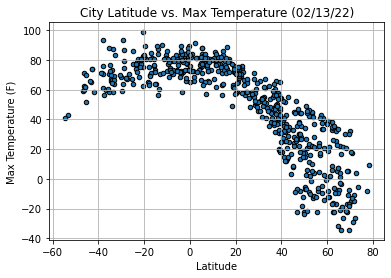

In [29]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", title="City Latitude vs. Max Temperature (02/13/22)", xlabel="Latitude", ylabel="Max Temperature (F)", grid=True, edgecolors="black")

plt.savefig("images/LatTemp.png")

plt.show()

In [ ]:
#This plot shows that the temperature is typically highest in cities with latitudes around 0.
#This makes sense as cities near the equator (latitude = 0) are hottest due to sunlight hitting the Earth most directly at that spot. 

## Latitude vs. Humidity Plot

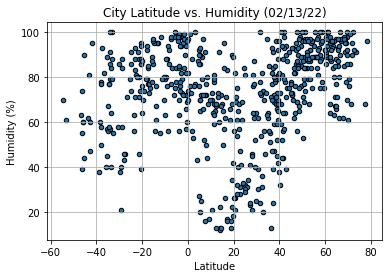

In [30]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity (02/13/22)", xlabel="Latitude", ylabel="Humidity (%)", grid=True, edgecolors="black")

plt.savefig("images/LatHum.png")

plt.show()

In [ ]:
#This plot shows that there is little relationship between humidity and latitude.
#There is a high concentration of cities with humidty over 60%.

## Latitude vs. Cloudiness Plot

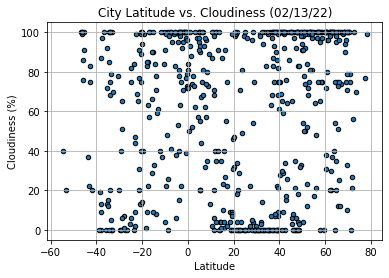

In [32]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", title="City Latitude vs. Cloudiness (02/13/22)", xlabel="Latitude", ylabel="Cloudiness (%)", grid=True, edgecolors="black")

plt.savefig("images/LatCloud.png")

plt.show()

In [ ]:
#This plot shows that there is little correlation between cloudiness and latitude.
#However, there are high concentrations of cities with cloudiness around 0% and 100%.

## Latitude vs. Wind Speed Plot

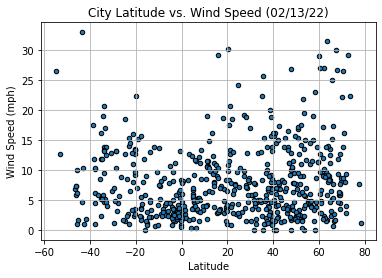

In [33]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", title="City Latitude vs. Wind Speed (02/13/22)", xlabel="Latitude", ylabel="Wind Speed (mph)", grid=True, edgecolors="black")

plt.savefig("images/LatWind.png")

plt.show()

In [ ]:
#This plot shows there is little correlation between latitude and wind speed.
#However, the majority of cities have wind speeds belw 10mph.

## Linear Regression

In [34]:
#Separate hemispheres
north = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.750318024522322


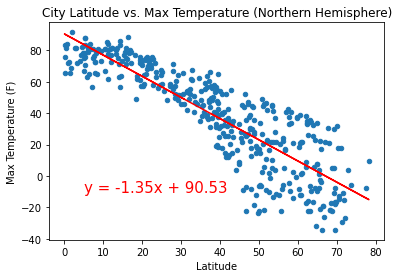

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Max Temp"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

north.plot(kind="scatter", x="Lat", y="Max Temp", title="City Latitude vs. Max Temperature (Northern Hemisphere)", xlabel="Latitude", ylabel="Max Temperature (F)")
plt.plot(north["Lat"], regress_values, "r-")
plt.annotate(line_eq, (5,-10), fontsize=15,color="red")

plt.savefig("images/LatTempNorth.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.22707180527275708


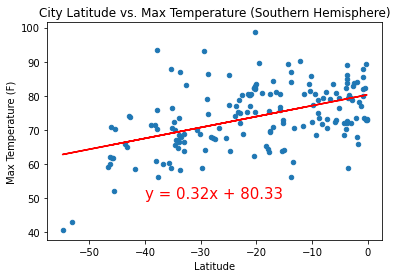

In [50]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Max Temp"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

south.plot(kind="scatter", x="Lat", y="Max Temp", title="City Latitude vs. Max Temperature (Southern Hemisphere)", xlabel="Latitude", ylabel="Max Temperature (F)")
plt.plot(south["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-40,50), fontsize=15,color="red")

plt.savefig("images/LatTempSouth.png")

plt.show()

In [ ]:
#This pair shows that there is a fairly strong correlation between latitude and max temp in the northern hemisphere due to the high r value.
#However, there is a lot of variability in the southern hemisphere due to the low r value. There appear to be fewer data points, which could
#be contributing to a lack of clear trend emerging.
#In both cases, the model reaches it's max when latitude is around 0 due to the equatorial environment.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22723333364661075


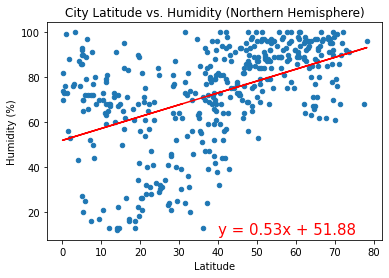

In [61]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Humidity"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

north.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity (Northern Hemisphere)", xlabel="Latitude", ylabel="Humidity (%)")
plt.plot(north["Lat"], regress_values, "r-")
plt.annotate(line_eq, (40, 10), fontsize=15,color="red")

plt.savefig("images/LatHumNorth.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16081961684056126


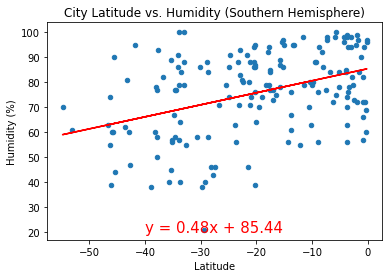

In [62]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Humidity"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

south.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity (Southern Hemisphere)", xlabel="Latitude", ylabel="Humidity (%)")
plt.plot(south["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-40, 20), fontsize=15,color="red")

plt.savefig("images/LatHumSouth.png")

plt.show()

In [ ]:
#This pair confirms that the correlation between latitude and humidity is fairly week no matter the location as both r values are quite low.
#Interestingly, there is not a peak around the equator according to the fitted regression line.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04669600660716055


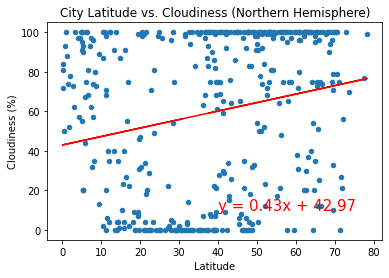

In [63]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Cloudiness"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

north.plot(kind="scatter", x="Lat", y="Cloudiness", title="City Latitude vs. Cloudiness (Northern Hemisphere)", xlabel="Latitude", ylabel="Cloudiness (%)")
plt.plot(north["Lat"], regress_values, "r-")
plt.annotate(line_eq, (40, 10), fontsize=15,color="red")

plt.savefig("images/LatCloudNorth.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07664105178835418


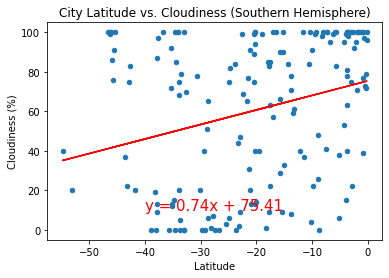

In [65]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Cloudiness"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

south.plot(kind="scatter", x="Lat", y="Cloudiness", title="City Latitude vs. Cloudiness (Southern Hemisphere)", xlabel="Latitude", ylabel="Cloudiness (%)")
plt.plot(south["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-40, 10), fontsize=15,color="red")

plt.savefig("images/LatCloudSouth.png")

plt.show()

In [ ]:
#This pair shows that there is little to no relationship between latitude and cloudiness as the r-values are incredibly small.
#However, it seems cloudiness is determined visually, which could lead to human error.
#Since cloud formation is linked to the presence of water and there is ocean at every latitude, it would follow that cloudiness should be relatively even across latitutudes with concentrations in cities with bodies of water.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02069825537808611


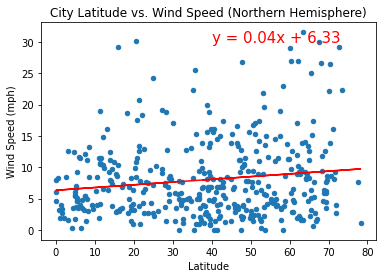

In [67]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Wind Speed"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

north.plot(kind="scatter", x="Lat", y="Wind Speed", title="City Latitude vs. Wind Speed (Northern Hemisphere)", xlabel="Latitude", ylabel="Wind Speed (mph)")
plt.plot(north["Lat"], regress_values, "r-")
plt.annotate(line_eq, (40, 30), fontsize=15,color="red")

plt.savefig("images/LatWindNorth.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1372487309655237


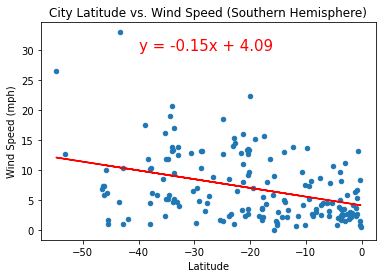

In [69]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Wind Speed"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")

south.plot(kind="scatter", x="Lat", y="Wind Speed", title="City Latitude vs. Wind Speed (Southern Hemisphere)", xlabel="Latitude", ylabel="Wind Speed (mph)")
plt.plot(south["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-40, 30), fontsize=15,color="red")

plt.savefig("images/LatWindSouth.png")

plt.show()

In [ ]:
#This pair shows that the correlation between latitude and wind speed is much higher in the southern hemisphere.
#However, the r values are fairly low in both hemispheres, so the data has high variability.